In [1]:
import logging
logging.basicConfig (
    format = '%(asctime)s [%(levelname)s] %(message)s',
    level = logging.DEBUG
)

from init import *

In [2]:
class Example1UKF (UnscentedKalmanFilter):
    
    def __init__ (self):
        super().__init__()

        # the true state (used in this test)
        self.__true_state = np.matrix([
            [11],
            [22]
        ], dtype=np.float64)
        
        # initial state estimate
        self.x = np.matrix([
            [-100],
            [-100]
        ], dtype=np.float64)

        # initial state error matrix
        big = 10
        self.P = np.matrix([
            [big, 0 ],
            [ 0, big]
        ], dtype=np.float64)
        
        super().Init(2,1)
        
        self.monitor = KalmanFilterMonitor(self)

    def GetTrueState (self):
        '''optional, only useful for testing'''
        return self.__true_state
        
    def GetIterationTime (self,iteration):
        return float(iteration)
        
    def GetPredictedMeasurement (self, state, iteration):
        '''override'''
        assert state.shape == (2,1)
        value = state[0,0] + state[1,0]*self.GetIterationTime(iteration)
        return np.matrix([[value]], dtype=np.float64)
        
    def GetMeasurement (self, iteration):
        '''override'''
        scaling = 1
        measurement_error = scaling * np.random.default_rng().normal(0,1)
        error_matrix = np.matrix([[scaling]], dtype=np.float64)
        measurement_value = self.GetPredictedMeasurement(self.__true_state, iteration) + measurement_error
        return (measurement_value, error_matrix)
    
    def Log (self, iteration, name, value):
        self.monitor.AddData(iteration, name, value)

In [5]:
e = Example1UKF()
e.RunAllIterations(1,20)

unmatched predicted sigma points
unmatched predicted state estimate
unmatched predicted error cov
unmatched predicted_measurement:
unmatched actual measurement
unmatched kalman_gain
unmatched predicted sigma points
unmatched predicted state estimate
unmatched predicted error cov
unmatched predicted_measurement:
unmatched actual measurement
unmatched kalman_gain
unmatched predicted sigma points
unmatched predicted state estimate
unmatched predicted error cov
unmatched predicted_measurement:
unmatched actual measurement
unmatched kalman_gain
unmatched predicted sigma points
unmatched predicted state estimate
unmatched predicted error cov
unmatched predicted_measurement:
unmatched actual measurement
unmatched kalman_gain
unmatched predicted sigma points
unmatched predicted state estimate
unmatched predicted error cov
unmatched predicted_measurement:
unmatched actual measurement
unmatched kalman_gain
unmatched predicted sigma points
unmatched predicted state estimate
unmatched predicted er

In [7]:
import pandas as pd
df = pd.DataFrame(e.monitor._data)
df

,iteration,residual[0],residual.length,state[0],state[1],state_diff[0],state_diff[1],state_diff.length
0,1,-231.931180,53792.072213,10.443419,10.443419,-0.556581,-11.556581,133.864347
1,2,-24.803239,615.200659,-2.610917,27.849201,-13.610917,5.849201,219.470217
2,3,2.943497,8.664175,-1.121989,26.589338,-12.121989,4.589338,168.004636
3,4,5.469766,29.918340,1.191154,25.093973,-9.808846,3.093973,105.786118
4,5,5.078553,25.791696,2.995532,24.141914,-8.004468,2.141914,68.659301
5,6,3.728138,13.899013,4.129801,23.634906,-6.870199,1.634906,49.872546
6,7,5.465598,29.872762,5.579789,23.072030,-5.420211,1.072030,30.527934
7,8,5.032700,25.328069,6.761849,22.666270,-4.238151,0.666270,18.405841
8,9,0.803264,0.645233,6.930991,22.614215,-4.069009,0.614215,16.934093
9,10,2.236745,5.003027,7.357637,22.495199,-3.642363,0.495199,13.512034


2023-01-03 18:36:49,694 [DEBUG] matplotlib data path: /home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2023-01-03 18:36:49,700 [DEBUG] CONFIGDIR=/home/zvyagin/.config/matplotlib
2023-01-03 18:36:49,703 [DEBUG] interactive is False
2023-01-03 18:36:49,704 [DEBUG] platform is linux
2023-01-03 18:36:49,775 [DEBUG] CACHEDIR=/home/zvyagin/.cache/matplotlib
2023-01-03 18:36:49,779 [DEBUG] Using fontManager instance from /home/zvyagin/.cache/matplotlib/fontlist-v330.json
2023-01-03 18:36:49,993 [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-03 18:36:49,995 [DEBUG] Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-01-03 18:36:49,997 [DEBUG] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-01-03 18:36:49,998 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', n

2023-01-03 18:36:50,014 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,016 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf', name='DejaVu Sans Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,016 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 18:36:50,017 [DEBUG] findfont: score(FontEntry(fname='/home/zvyagin/.local/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STI

2023-01-03 18:36:50,031 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman8-italic.otf', name='Latin Modern Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 18:36:50,032 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSans-Eight.otf', name='Fira Sans', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
2023-01-03 18:36:50,033 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/roboto-slab/RobotoSlab-Bold.ttf', name='Roboto Slab', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 18:36:50,034 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/firasanscompressed-regular.otf', name='Fira Sans Compressed', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,035 [DEBUG] findfont: sc

2023-01-03 18:36:50,065 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsansquot8-regular.otf', name='Latin Modern Sans Quotation', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,066 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf', name='Ubuntu', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-01-03 18:36:50,067 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsans8-regular.otf', name='Latin Modern Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,067 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman5-bold.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 18:36:50,068 [DEBUG] 

2023-01-03 18:36:50,095 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmromanslant12-regular.otf', name='Latin Modern Roman Slanted', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,096 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-ExtraBold.otf', name='Fira Sans Condensed', style='normal', variant='normal', weight=800, stretch='condensed', size='scalable')) = 10.629999999999999
2023-01-03 18:36:50,097 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrepagella-regular.otf', name='TeX Gyre Pagella', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,097 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-HairItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=100, stretch='cond

2023-01-03 18:36:50,120 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmsansdemicond10-regular.otf', name='Latin Modern Sans Demi Cond', style='normal', variant='normal', weight=600, stretch='condensed', size='scalable')) = 10.44
2023-01-03 18:36:50,121 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrebonum-regular.otf', name='TeX Gyre Bonum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,121 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-ExtraLightItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=250, stretch='condensed', size='scalable')) = 11.3925
2023-01-03 18:36:50,122 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman10-bold.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=700, stretch='normal', s

2023-01-03 18:36:50,149 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstArt.ttf', name='KacstArt', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
2023-01-03 18:36:50,150 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSans-HairItalic.otf', name='Fira Sans', style='italic', variant='normal', weight=100, stretch='normal', size='scalable')) = 11.335
2023-01-03 18:36:50,151 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSerif-Italic.ttf', name='Liberation Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 18:36:50,152 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmmonoproplt10-regular.otf', name='Latin Modern Mono Prop Light', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,153 [DEBUG] findfon

2023-01-03 18:36:50,179 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 18:36:50,180 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-BoldItalic.otf', name='Nimbus Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 18:36:50,181 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Jet.ttf', name='Jet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,181 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/open-sans/OpenSans-CondLight.ttf', name='Open Sans', style='normal', variant='normal', weight=300, stretch='condensed', size='scalable')) = 10.344999999999999
2023-01-03 18:36:50,182 [DEBUG] findfont: score(FontE

2023-01-03 18:36:50,206 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Nagham.ttf', name='Nagham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,207 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-Hair.otf', name='Fira Sans Condensed', style='normal', variant='normal', weight=100, stretch='condensed', size='scalable')) = 10.535
2023-01-03 18:36:50,208 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2023-01-03 18:36:50,209 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', name='Liberation Mono', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 18:36:50,209 [DEBUG] 

2023-01-03 18:36:50,233 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmmono12-regular.otf', name='Latin Modern Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,253 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 18:36:50,253 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Mashq.ttf', name='Mashq', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,254 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeMonoOblique.ttf', name='FreeMono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 18:36:50,255 [DEBUG] findfont: score(F

2023-01-03 18:36:50,274 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf', name='URW Bookman', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2023-01-03 18:36:50,275 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Furat.ttf', name='Furat', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,275 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf', name='Ubuntu', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 18:36:50,276 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Nice.ttf', name='Nice', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,277 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/open-

2023-01-03 18:36:50,297 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_AlArabiya.ttf', name='AlArabiya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,298 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeMonoBoldOblique.ttf', name='FreeMono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2023-01-03 18:36:50,298 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-Bold.otf', name='C059', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 18:36:50,299 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrecursor-regular.otf', name='TeX Gyre Cursor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,300 [DEBUG] findfont: score(FontEnt

2023-01-03 18:36:50,321 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCompressed-SemiBoldItalic.otf', name='Fira Sans Compressed', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
2023-01-03 18:36:50,322 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/fira/FiraSansCondensed-UltraItalic.otf', name='Fira Sans Condensed', style='italic', variant='normal', weight=950, stretch='condensed', size='scalable')) = 11.772499999999999
2023-01-03 18:36:50,322 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWGothic-BookOblique.otf', name='URW Gothic', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2023-01-03 18:36:50,323 [DEBUG] findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrecursor-bold.otf', name='TeX Gyre Cursor', style='normal', variant='normal', weight=700, stretch='normal', size='scalabl

2023-01-03 18:36:50,343 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Hor.ttf', name='Hor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,344 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Dimnah.ttf', name='Dimnah', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,345 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-arabeyes/ae_Granada.ttf', name='Granada', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-01-03 18:36:50,346 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf', name='Ubuntu', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2023-01-03 18:36:50,346 [DEBUG] findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVu

<AxesSubplot: xlabel='iteration'>

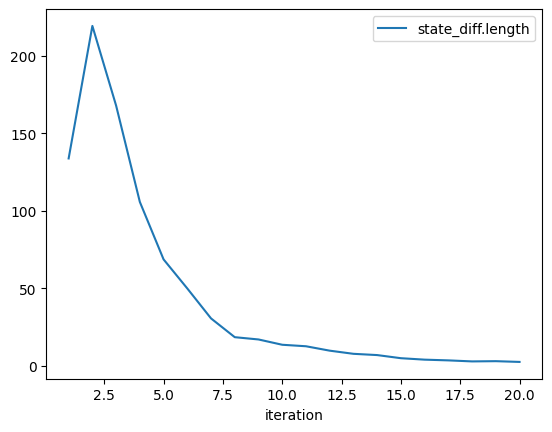

In [8]:
df.plot(x='iteration', y='state_diff.length')

<AxesSubplot: xlabel='iteration'>

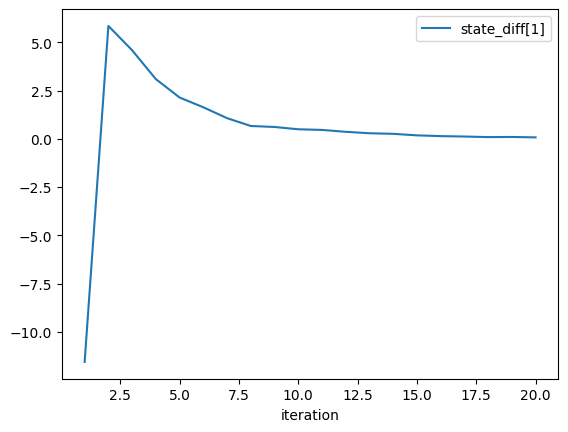

In [11]:
df.plot(x='iteration', y='state_diff[1]')